<a href="https://colab.research.google.com/github/MiaKuntz/machine_learning_2/blob/main/ML4BI_E3_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for BI 2

## Deep Learning exercises for week 3

In this exercise, you'll practice on the examples we went through during the lectures.

Try one or more!

1. You used two representation layers before the final classification layer. Try using one or three representation layers, and see how doing so affects validation and test accuracy

2. Try using layers with more units or fewer units: 32 units, 64 units, and so on.

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb # importing imdb dataset from keras datasets module 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( # loading the imdb dataset into train and test data and labels 
    num_words=10000) # only keeping the top 10,000 most frequently occurring words in the training data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np # importing numpy module 
def vectorize_sequences(sequences, dimension=10000): # defining a function to vectorize the sequences 
    results = np.zeros((len(sequences), dimension)) # creating an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences): # iterating over the sequences 
        for j in sequence: # iterating over the sequence 
            results[i, j] = 1. # setting specific indices of results[i] to 1s 
    return results # returning the results
x_train = vectorize_sequences(train_data) # vectorizing the training data
x_test = vectorize_sequences(test_data) # vectorizing the test data

In [ ]:
y_train = np.asarray(train_labels).astype("float32") # converting the training labels to numpy array because the labels are scalars 
y_test = np.asarray(test_labels).astype("float32") # converting the test labels to numpy array because the labels are scalars

### Building your model

In [ ]:
from tensorflow import keras # importing keras module
from tensorflow.keras import layers # importing layers module from keras

model = keras.Sequential([ # creating a sequential model, which is a linear stack of layers 
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 units and relu activation function, which is the rectified linear unit that outputs a probability value between 0 and 1
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 units and relu activation function, which is the rectified linear unit that outputs a probability value between 0 and 1
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 unit and sigmoid activation function, which is the sigmoid activation function that outputs a probability value between 0 and 1
])
# the difference between relu and sigmoid activation functions is that the relu function is used for hidden layers and the sigmoid function is used for the output layer

In [ ]:
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer because it is generally a good choice for recurrent neural networks due to its ability to handle the vanishing gradient problem
              loss="binary_crossentropy", # setting loss function to binary_crossentropy because the problem is a binary classification problem 
              metrics=["accuracy"]) # setting metrics to accuracy because it is a good metric to use for classification problems since loss is not always a good indicator of performance and more difficult to interpret than accuracy

In [ ]:
x_val = x_train[:10000] # setting the validation data
partial_x_train = x_train[10000:] # setting the partial training data
y_val = y_train[:10000] # setting the validation labels
partial_y_train = y_train[10000:] # setting the partial training labels

In [ ]:
history = model.fit(partial_x_train, # training the model
                    partial_y_train, # training the model
                    epochs=20, # training the model for 20 epochs which is the number of times the model will be trained on the data
                    batch_size=512, # training the model with a batch size of 512 which is the number of samples per gradient update 
                    validation_data=(x_val, y_val), # validating the model 
                    verbose=0) # setting verbose to 0 to suppress the output of the model training process (this means that the output will not be displayed)

/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/

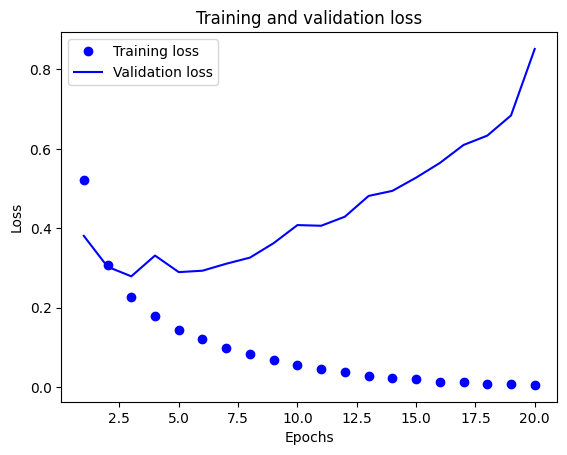

In [ ]:
import matplotlib.pyplot as plt # importing matplotlib module
history_dict = history.history # storing the history of the model
loss_values = history_dict["loss"] # storing the loss values
val_loss_values = history_dict["val_loss"] # storing the validation loss values
epochs = range(1, len(loss_values) + 1) # setting the epochs
plt.plot(epochs, loss_values, "bo", label="Training loss") # plotting the training loss
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # plotting the validation loss
plt.title("Training and validation loss") # setting the title of the plot
plt.xlabel("Epochs") # setting the x-axis label
plt.ylabel("Loss") # setting the y-axis label
plt.legend() # displaying the legend
plt.show() # displaying the plot

In [ ]:
# Access the history for the validation loss
val_loss = history.history['val_loss'] # storing the validation loss values 

# Find the index of the minimum validation loss
min_val_loss_epoch = val_loss.index(min(val_loss)) # finding the index of the minimum validation loss

print(f"Epoch with minimum validation loss: {min_val_loss_epoch + 1}") # printing the epoch with the minimum validation loss
# the model with one hidden layer and 16 units has a minimum validation loss at epoch 4 while the model with two hidden layers and 16 units each has a minimum validation loss at epoch 3

Epoch with minimum validation loss: 3


**Remove one layer representation.**

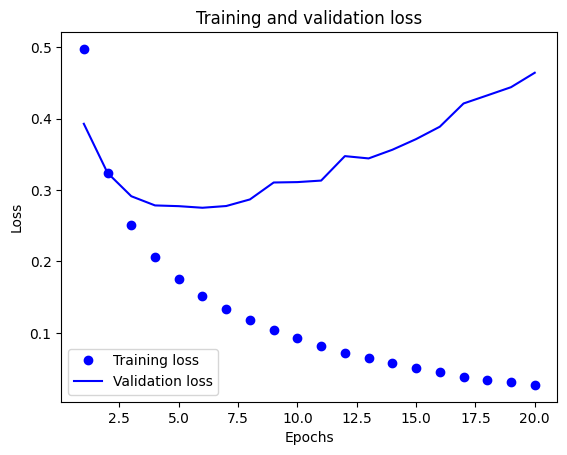

In [ ]:
from tensorflow import keras # importing keras module
from tensorflow.keras import layers # importing layers module from keras

model = keras.Sequential([ # creating a sequential model, which is a linear stack of layers
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 units and relu activation function, which is the rectified linear unit that outputs a probability value between 0 and 1
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 unit and sigmoid activation function, which is the sigmoid activation function that outputs a probability value between 0 and 1
])
# the difference between relu and sigmoid activation functions is that relu is used in hidden layers while sigmoid is used in the output layer for binary classification problems

# the difference between this model and the previous model is that this model has only one hidden layer with 16 units while the previous model had two hidden layers with 16 units each

model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer because it is generally a good choice for recurrent neural networks due to its ability to handle the vanishing gradient problem
              loss="binary_crossentropy", # setting loss function to binary_crossentropy because the problem is a binary classification problem
              metrics=["accuracy"]) # setting metrics to accuracy because it is a good metric to use for classification problems since loss is not always a good indicator of performance and more difficult to interpret than accuracy

history = model.fit(partial_x_train, # training the model
                    partial_y_train, # training the model
                    epochs=20, # training the model for 20 epochs which is the number of times the model will be trained on the data
                    batch_size=512, # training the model with a batch size of 512 which is the number of samples per gradient update
                    validation_data=(x_val, y_val), # validating the model 
                    verbose=0) # setting verbose to 0 to suppress the output of the model training process (this means that the output will not be displayed)

import matplotlib.pyplot as plt # importing matplotlib module
history_dict = history.history # storing the history of the model
loss_values = history_dict["loss"] # storing the loss values
val_loss_values = history_dict["val_loss"] # storing the validation loss values
epochs = range(1, len(loss_values) + 1) # setting the epochs
plt.plot(epochs, loss_values, "bo", label="Training loss") # plotting the training loss
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # plotting the validation loss
plt.title("Training and validation loss") # setting the title of the plot
plt.xlabel("Epochs") # setting the x-axis label
plt.ylabel("Loss") # setting the y-axis label
plt.legend() # displaying the legend
plt.show() # displaying the plot

In [ ]:
# Access the history for the validation loss
val_loss = history.history['val_loss'] # storing the validation loss values 

# Find the index of the minimum validation loss
min_val_loss_epoch = val_loss.index(min(val_loss)) # finding the index of the minimum validation loss

print(f"Epoch with minimum validation loss: {min_val_loss_epoch + 1}") # printing the epoch with the minimum validation loss
# the model with one hidden layer and 16 units has a minimum validation loss at epoch 4 while the model with two hidden layers and 16 units each has a minimum validation loss at epoch 3

Epoch with minimum validation loss: 6


**Add more units**

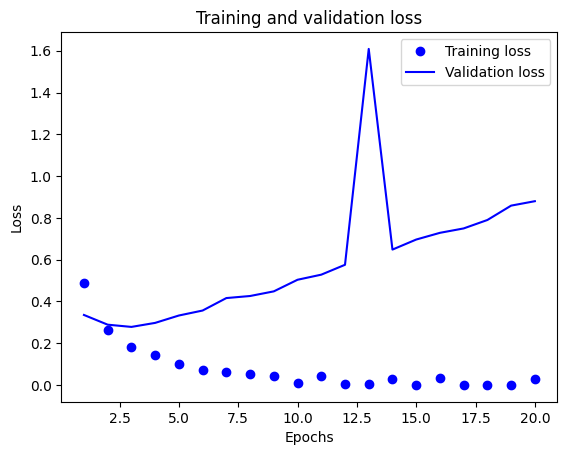

In [ ]:
from tensorflow import keras # importing keras module
from tensorflow.keras import layers # importing layers module from keras

model = keras.Sequential([ # creating a sequential model which is a linear stack of layers
    layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function which is the rectified linear unit that outputs a probability value between 0 and 1
    layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function which is the rectified linear unit that outputs a probability value between 0 and 1
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 unit and sigmoid activation function which is the sigmoid activation function that outputs a probability value between 0 and 1
])

model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer because it is generally a good choice for recurrent neural networks due to its ability to handle the vanishing gradient problem
              loss="binary_crossentropy", # setting loss function to binary_crossentropy because the problem is a binary classification problem
              metrics=["accuracy"]) # setting metrics to accuracy because it is a good metric to use for classification problems since loss is not always a good indicator of performance and more difficult to interpret than accuracy

history = model.fit(partial_x_train, # training the model
                    partial_y_train, # training the model
                    epochs=20, # training the model for 20 epochs which is the number of times the model will be trained on the data
                    batch_size=512, # training the model with a batch size of 512 which is the number of samples per gradient update
                    validation_data=(x_val, y_val), # validating the model
                    verbose=0) # setting verbose to 0 to suppress the output of the model training process (this means that the output will not be displayed)
 
import matplotlib.pyplot as plt # importing matplotlib module
history_dict = history.history # storing the history of the model
loss_values = history_dict["loss"] # storing the loss values
val_loss_values = history_dict["val_loss"] # storing the validation loss values
epochs = range(1, len(loss_values) + 1) # setting the epochs
plt.plot(epochs, loss_values, "bo", label="Training loss") # plotting the training loss
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # plotting the validation loss
plt.title("Training and validation loss") # setting the title of the plot
plt.xlabel("Epochs") # setting the x-axis label
plt.ylabel("Loss") # setting the y-axis label
plt.legend() # displaying the legend
plt.show() # displaying the plot

In [ ]:
# Access the history for the validation loss
val_loss = history.history['val_loss'] # storing the validation loss values

# Find the index of the minimum validation loss
min_val_loss_epoch = val_loss.index(min(val_loss)) # finding the index of the minimum validation loss

print(f"Epoch with minimum validation loss: {min_val_loss_epoch + 1}") # printing the epoch with the minimum validation loss
# the model with two hidden layers and 64 units each has a minimum validation loss at epoch 4
# comparing the models, the model with two hidden layers and 64 units each has the lowest validation loss at epoch 4

Epoch with minimum validation loss: 3


## Newswire

### Information bottleneck

Try creating an information bottleneck in your architecture. For example, you can this by using 64 neurons in the first layer and 4 neurons in the second.

Try different types of configurations and see how the validation loss or accuracy curve is affected. Write a function that allows to change the number of neurons in each layer and then make a joint plot of all the curves afterwards.

I have copied in the data loading and labels encoding steps from the course notebook to help you get started.

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters # importing reuters dataset from keras datasets module 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data( # loading the reuters dataset into train and test data and labels
    num_words=10000) # only keeping the top 10,000 most frequently occurring words in the training data

**Decoding newswires back to text**

In [ ]:
x_train = vectorize_sequences(train_data) # vectorizing the training data because the data is in the form of lists of integers which need to be converted to tensors for the model to process the data
x_test = vectorize_sequences(test_data) # vectorizing the test data because the data is in the form of lists of integers which need to be converted to tensors for the model to process the data

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46): # defining a function to one-hot encode the labels
    results = np.zeros((len(labels), dimension)) # creating an all-zero matrix of shape (len(labels), dimension)
    for i, label in enumerate(labels): # iterating over the labels
        results[i, label] = 1. # setting specific indices of results[i] to 1s
    return results # returning the results
y_train = to_one_hot(train_labels) # one-hot encoding the training labels
y_test = to_one_hot(test_labels) # one-hot encoding the test labels

In [ ]:
from tensorflow.keras.utils import to_categorical # importing to_categorical function from keras.utils module
y_train = to_categorical(train_labels) # converting the training labels to one-hot encoding categories because the labels are scalars that need to be converted to tensors for the model to process the data
y_test = to_categorical(test_labels) # converting the test labels to one-hot encoding categories because the labels are scalars  that need to be converted to tensors for the model to process the data

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000] # setting the validation data
partial_x_train = x_train[1000:] # setting the partial training data
y_val = y_train[:1000] # setting the validation labels
partial_y_train = y_train[1000:] # setting the partial training labels

### Building your model

In [ ]:
def news_nn(nl1, nl2): # defining a function to create a neural network model
    model = keras.Sequential([ # creating a sequential model which is a linear stack of layers
        layers.Dense(nl1, activation="relu"), # adding a dense layer with nl1 units and relu activation function, which is the rectified linear unit that outputs a probability value between 0 and 1
        layers.Dense(nl2, activation="relu"), # adding a dense layer with nl2 units and relu activation function, which is the rectified linear unit that outputs a probability value between 0 and 1
        layers.Dense(46, activation="softmax") # adding a dense layer with 46 units and softmax activation function, which is the softmax activation function that outputs a probability value between 0 and 1
    ])

    model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer because it is generally a good choice for recurrent neural networks due to its ability to handle the vanishing gradient problem
                  loss="categorical_crossentropy", # setting loss function to categorical_crossentropy because the problem is a multiclass classification problem
                  metrics=["accuracy"]) # setting metrics to accuracy because it is a good metric to use for classification problems since loss is not always a good indicator of performance and more difficult to interpret than accuracy

    history = model.fit(partial_x_train, # training the model
                        partial_y_train, # training the model
                        epochs=20, # training the model for 20 epochs which is the number of times the model will be trained on the data
                        batch_size=512, # training the model with a batch size of 512 which is the number of samples per gradient update
                        validation_data=(x_val, y_val), # validating the model
                        verbose=0) # setting verbose to 0 to suppress output 

    # Return validation accuracy for plotting outside the function
    return history.history['val_accuracy'] # returning the validation accuracy


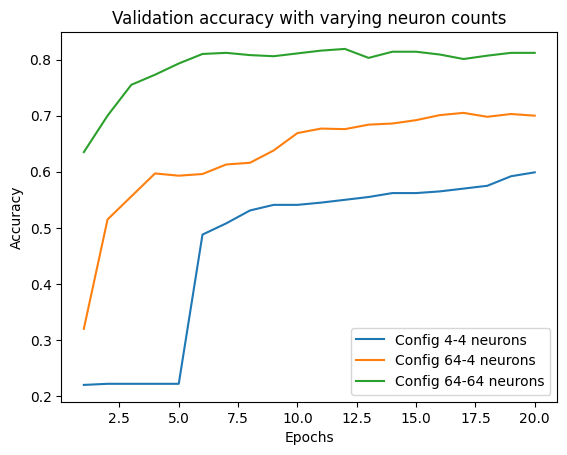

In [ ]:
# Configurations of neurons to try
neuron_configs = [(4, 4), (64, 4), (64, 64)] # setting the configurations of neurons to try to different combinations of neurons in the hidden layers 
val_accuracies = [] # initializing an empty list to store validation accuracies
 
# Run training for each neuron configuration and collect validation accuracies
for nl1, nl2 in neuron_configs: # iterating over the neuron configurations
    val_acc = news_nn(nl1, nl2) # running the news_nn function with the neuron configurations
    val_accuracies.append(val_acc) # appending the validation accuracy to the list

# Plotting all the validation accuracies
epochs = range(1, 21) # setting the epochs to 20 because the model was trained for 20 epochs 
for i, val_acc in enumerate(val_accuracies): # iterating over the validation accuracies
    plt.plot(epochs, val_acc, label=f'Config {neuron_configs[i][0]}-{neuron_configs[i][1]} neurons') # plotting the validation accuracy

plt.title('Validation accuracy with varying neuron counts') # setting the title of the plot
plt.xlabel('Epochs') # setting the x-axis label
plt.ylabel('Accuracy') # setting the y-axis label
plt.legend() # displaying the legend
plt.show() # displaying the plot